In [13]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv("../datasets/Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.shape

(200, 5)

In [7]:
df.rename(columns={
    "Annual Income (k$)":"Annual Income",
    "Spending Score (1-100)":"Spending Score"
},inplace=True)

In [8]:
df.head()


,CustomerID,Gender,Age,Annual Income,Spending Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [9]:
df.isnull().sum()

CustomerID        0
Gender            0
Age               0
Annual Income     0
Spending Score    0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      200 non-null    int64 
 1   Gender          200 non-null    object
 2   Age             200 non-null    int64 
 3   Annual Income   200 non-null    int64 
 4   Spending Score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 9.4+ KB


In [12]:
X = df[["Annual Income","Spending Score"]].values
X.shape

(200, 2)

#### Finding Optimun Cluster

##### Within Cluster Sum of Square

In [15]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++')
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

print(wcss)

[269981.28, 181363.59595959596, 106348.37306211119, 73679.78903948834, 44448.45544793371, 37271.8862365895, 31583.261826590504, 24990.434310396897, 21809.927562615187, 19649.596582866965]


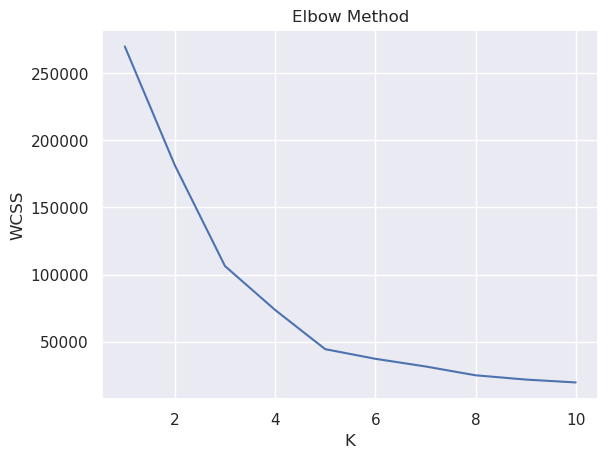

In [31]:
sns.set()
plt.plot(range(1,11),wcss)
plt.title("Elbow Method")
plt.xlabel("K")
plt.ylabel("WCSS")
plt.show()

In [24]:
kmeans = KMeans(n_clusters=5,init='k-means++',random_state=0)

y = kmeans.fit_predict(X)
print(y)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


In [28]:
print(kmeans.cluster_centers_)

[[88.2        17.11428571]
 [55.2962963  49.51851852]
 [86.53846154 82.12820513]
 [25.72727273 79.36363636]
 [26.30434783 20.91304348]]


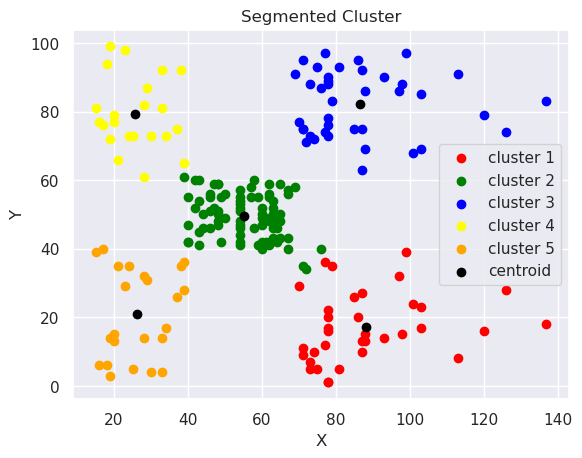

In [30]:
sns.set()
plt.scatter(X[y==0,0],X[y==0,1],c="red",label='cluster 1')
plt.scatter(X[y==1,0],X[y==1,1],c="green",label='cluster 2')
plt.scatter(X[y==2,0],X[y==2,1],c="blue",label='cluster 3')
plt.scatter(X[y==3,0],X[y==3,1],c="yellow",label='cluster 4')
plt.scatter(X[y==4,0],X[y==4,1],c="orange",label='cluster 5')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c='black',label='centroid')
plt.title("Segmented Cluster")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()
